# Unsupervised Learning Team JS4
We will use this Notebook to build and test various models relating to our goal, But due to the size of the data in this notebook we will only construct one model and provide links of the notebooks for the other models.




 ## Insert images

## Collaborators:
- Kwanda Silekwa
- Nomfundo Manyisa
- Sihle Riti
- Thanyani Khedzi
- Thembinkosi Malefo
- Ofentse Makeketlane

# Challenge Description


In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

# **Table of contents:**
- [Problem Statement](#section-one)
  * [Submission Format](#section-one)
- [Our Comet experiment](#section-two)
- [Installing packages and Imports](#section-three)
- [Loading the dataset](#section-four)
- [Evaluating the data(Preprocessing)](#section-five)
  * [Duplicates](#section-six)
  * [Dataset Overview](#section-seven)
  * [Analysis of imdb_data](#section-eight)
  * [Evaluating Length of Unique Values](#section-nine)
  * [Calculating Avg and Volume of Ratings](#section-ten)
  * [genres to lists](#section-eleven)
  * [Bringing in Keywords and Tags](#section-twelve)
  * [Fuzzy String Matching With Pandas and FuzzyWuzzy](#section-thirteen)
  * [Checking for missing values](#section-fourthen)
- [Exploratory data analysis(EDA)](#section-fifteen)
- [Collaborative and Content base filtering Explained](#section-sixteen)
- [Main Focus Content Based Filtering](#section-seventeen)
- [Main Focus Collaborative Based Filtering](#section-eighteen)
  * [Singular value decomposition](#section-nineteen)
- [Modeling phase](#section-twenty)
- [SVD prediction with altered parameters](#section-twenty-one)
- [Submission](#section-twenty-two)
- [Conclusion](#section-twenty-three)
- [Pickling in models](#section-twenty-four)
- [Links to other Notebooks](#section-twenty-five)
- [References](#section-twenty-six)
- [Comet ending](#section-twenty-seven)

<a id="section-one"></a>

# **Problem Statement**

The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error  is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of generating user movie ratings via recommendation algorithms, the the formula is given by:

Where \\( \hat{R} \\) is the total number of recommendations generated for users and movies, with \\( r_{ui} \\) and \\( \hat{r}_{ui} \\) being the true and predicted ratings for user \\( u \\) watching movie \\( i \\) respectively.
We are required to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences

<a id="subsection-one"></a>
# **Submission Format**
For every author in the dataset, submission files should contain two columns: Id and rating. 'Id' is a concatenation of the userID and movieID given in the test file using an '_' character. 'rating' is the predicted rating for a given user-movie pair, 

<a id="section-two"></a>
# **Our Comet Experiment**

For effective experimentation and version controll we used Comet. Comet, built specifically for Machine Learning, allows us to track changes to our models as we develop, train, and test them. It provides a convenient graphical interface to moniter model performance while tweaking the model, along with the ability to reproduce any logged experiment. Below is a guide on how to use Comet.

In [1]:
# Remove the # to install comet
!pip install comet_ml

     |████████████████████████████████| 276 kB 861 kB/s eta 0:00:01
     |████████████████████████████████| 529 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.4 MB/s eta 0:00:01
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=9841937784d652c3f32e0d41ff5ab030380da148db4118fe89a3783461a215d9
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="9KtCn2lrUX9YPb6O85WELvqwd",
    project_name="unsupervised-movie-reccomendation",
    workspace="givendatascience",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/givendatascience/unsupervised-movie-reccomendation/326a22c904b544e5ba1e3d8503152d7d



# **Installing packages and Imports**
<a id="section-three"></a>

Please download all relevant packages in. There is no terminal so you will pip install everything.

You can find a list of recommended install from the Intro to Recommender system notebook.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-challenge/movies.csv
/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-challenge/train.csv
/kaggle/input/edsa-movie-recommendation-challenge/test.csv
/kaggle/input/edsa-movie-recommendation-challenge/tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/links.csv


In [4]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# importing the libraries

import math
import random
import json
import re
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from plotly.offline import iplot
import plotly.graph_objs as go

# Packages for modeling
from surprise import NormalPredictor
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise import BaselineOnly, SlopeOne, CoClustering
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

<a id="section-four"></a>
# **Loading the dataset**
We going to load the dataframe will be working with

In [5]:
df_sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/movies.csv')
df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv')
df_genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv')
df_genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv')
df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/train.csv')
df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/test.csv')
df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/tags.csv')
df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/links.csv')

<a id="section-five"></a>
# **Evaluating Data(Pre-processing)**
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

### Supplied files
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [6]:
print("Train data contains {} rows and {} columns".format(df_train.shape[0], df_train.shape[1]))
print("Movie data contains {} rows and {} columns".format(df_movies.shape[0], df_movies.shape[1]))
print("Imdb data contains {} rows and {} columns".format(df_imdb.shape[0], df_imdb.shape[1]))
print("Genome_tags data contains {} rows and {} columns".format(df_tags.shape[0], df_tags.shape[1]))
print("Genome_scores data contains {} rows and {} columns".format(df_genome_scores.shape[0], df_genome_scores.shape[1]))
print("Tags data contains {} rows and {} columns".format(df_tags.shape[0], df_tags.shape[1]))
print("Links data contains {} rows and {} columns".format(df_links.shape[0], df_links.shape[1]))
print("Test data contains {} rows and {} columns".format(df_test.shape[0], df_test.shape[1]))

Train data contains 10000038 rows and 4 columns
Movie data contains 62423 rows and 3 columns
Imdb data contains 27278 rows and 6 columns
Genome_tags data contains 1093360 rows and 4 columns
Genome_scores data contains 15584448 rows and 3 columns
Tags data contains 1093360 rows and 4 columns
Links data contains 62423 rows and 3 columns
Test data contains 5000019 rows and 2 columns


### Alternative view code for viewing coulumns and rows of the dataset

In [7]:
# Declaring a list that contains the names of the dataframes
dfs = [df_train, df_test, df_genome_scores, df_genome_tags, df_imdb, df_links, df_movies, df_tags]
# Create a list of the names of the imported datasets
df_names = ['train', 'test', 'genome_scores', 'genome_tags',
            'imdb_data', 'links', 'movies', 'tags']
dfs_dict = {}  # declaring an empty dictionary
for name, data in zip(df_names, dfs):  # iterate over the list and dictionary
    dfs_dict[name] = [data.shape[0], data.shape[1]]
    df_prop = pd.DataFrame(dfs_dict,
                          index=['rows', 'columns']).transpose()
df_properties = df_prop.sort_values(by='rows', ascending=False)

df_properties  # view the final output

,rows,columns
genome_scores,15584448,3
train,10000038,4
test,5000019,2
tags,1093360,4
links,62423,3
movies,62423,3
imdb_data,27278,6
genome_tags,1128,2


In [8]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Movies:

- movieId : Identify the movies that are watched 

- title : Entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

- genres: They are pipe-separated list, and are selected from the following:
    - Action
    - Adventure
    - Animation
    - Children's
    - Comedy
    - Crime
    - Documentary
    - Drama
    - Fantasy
    - Film-Noir
    - Horror
    - Musical
    - Mystery
    - Romance
    - Sci-Fi
    - Thriller
    - War
    - Western
    - (no genres listed)

In [9]:
df_sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [10]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [11]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


#### genome-scores:

* movieId : Identifier for movies
* tagId :
* relevance

In [12]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


#### Genome_tags:

- tagId
- tag : tag descriptions for the tag IDs in the genome file

In [13]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


#### Train:

UserId
movieId : Identifier for movies used
rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [14]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [15]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


#### tags:

* userId
* movieId
* tag : User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and * purpose of a particular tag is determined by each user.
* timestamp : represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [16]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### Links:

- movieId : Identifier for movies used by https://movielens.org
- imdbId : Identifier for movies used by http://www.imdb.com
- tmdbId : An identifier for movies used by https://www.themoviedb.org.

<a id="section-six"></a>
## **Duplicates**
**Checking any duplicate values:**

At times our dataset may entail some duplicated values which are not necessary therefore this values must be removed, before removing these duplicates we are able to first check if we do have them. We will implement this by the code below.## Duplicates are very important to be aware of them they might twist around you predictions

In [17]:
# Checking for unique users and the movieId's in the train dataset
users = len(df_train.userId.unique())
items = len(df_train.movieId.unique())
print('There are {} unique users and {}\
 unique movies train dataset with {} duplicated entries'.format(users, items, df_train[df_train.duplicated()].count().sum()))

There are 162541 unique users and 48213 unique movies train dataset with 0 duplicated entries


<a id="6"></a>
### **Whole Dataset Overview**

We first look at the shape (number of entries/rows and columns) of the datasets in order to have a general overview.
Below is a really nice code that gives a well sorted summary of the data.

In [18]:
# Declaring a list that contains the names of the dataframes
dfs = [df_train, df_test, df_genome_scores, df_genome_tags, df_imdb, df_links, df_movies, df_tags]
# Create a list of the names of the imported datasets
df_names = ['train', 'test', 'genome_scores', 'genome_tags',
            'imdb_data', 'links', 'movies', 'tags']
dfs_dict = {}  # declaring an empty dictionary
for name, data in zip(df_names, dfs):  # iterate over the list and dictionary
    dfs_dict[name] = [data.shape[0], data.shape[1]]
    df_prop = pd.DataFrame(dfs_dict,
                          index=['rows', 'columns']).transpose()
df_properties = df_prop.sort_values(by='rows', ascending=False)

df_properties  # view the final output

,rows,columns
genome_scores,15584448,3
train,10000038,4
test,5000019,2
tags,1093360,4
links,62423,3
movies,62423,3
imdb_data,27278,6
genome_tags,1128,2


<a id="section-eight"></a>
## **Analysis of imdb_data**
**Checking Analysis of imdb_data:**

At times our dataset may entail some duplicated values which are not necessary therefore this values must be removed, before removing these duplicates we are able to first check if we do have them. We will implement this by the code below.## Duplicates are very important to be aware of them they might twist around you predictions

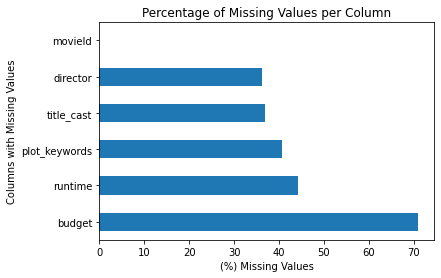

In [19]:
# The percentage of each column of missing values
total = df_imdb.isnull().sum().sort_values(ascending=False)
percent_1 = df_imdb.isnull().sum()/df_imdb.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2],
                         axis=1, keys=['Total', '(%) missing'])
missing_data['(%) missing'].plot(kind='barh')
plt.xlabel('(%) Missing Values')
plt.ylabel('Columns with Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.show()

<a id="section-nine"></a>
## **Evaluating Length of Unique Values**


In [20]:
# Find the length of the unique use
len(df_train['userId'].unique()), len(df_train['movieId'].unique())

(162541, 48213)

<a id="section-ten"></a>
## **Calculating Avg and Volume of Ratings**


In [21]:
ratings_summary = df_train.groupby('movieId') \
       .agg({'rating':'mean', 'userId':'count'}) \
       .rename(columns={'rating':'rating_avg','userId':'rating_count'}) \
       .reset_index()

movie_ratings = pd.merge(ratings_summary, df_movies)
movie_ratings.head(3)

,movieId,rating_avg,rating_count,title,genres
0,1,3.889971,23062,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.263414,9654,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.132325,4727,Grumpier Old Men (1995),Comedy|Romance


<a id="section-eleven"></a>
## **genres to lists**

In [22]:
movie_ratings.genres = movie_ratings.genres.str.split('|')
movie_ratings.head(3)

,movieId,rating_avg,rating_count,title,genres
0,1,3.889971,23062,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,3.263414,9654,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,3.132325,4727,Grumpier Old Men (1995),"[Comedy, Romance]"


<a id="section-twelve"></a>
## **Bringing in Keywords and Tags**


In [23]:
# Capturing Tags only if its relevance is higher than 80% to a movie
gs = df_genome_scores[df_genome_scores['relevance'] > 0.80]
gs.head(5)

,movieId,tagId,relevance
28,1,29,0.89375
62,1,63,0.94725
63,1,64,0.98425
185,1,186,0.95475
192,1,193,0.81450


In [24]:
tags_scores = pd.merge(df_genome_tags ,gs , on = ['tagId'])
tags_scores.sort_values(['movieId'], ascending=True).head(10)

,tagId,tag,movieId,relevance
84987,717,nostalgic,1,0.87225
21821,204,children,1,0.95975
64820,536,imdb top 250,1,0.93675
23277,215,classic,1,0.81500
60023,497,heartwarming,1,0.81225
57663,469,great movie,1,0.90725
128599,1062,unlikely friendships,1,0.89625
26990,244,computer animation,1,0.99875
126794,1036,toys,1,0.99925
3961,29,adventure,1,0.89375


In [25]:
ky = tags_scores[['tag','movieId']]
ky.drop_duplicates(keep=False,inplace=True) 

A_ky = ky.groupby('tag') \
       .agg({'movieId':'count'}) \
       .rename(columns={'movieId':'count'}) \
       .reset_index()
A_ky.head(5)

,tag,count
0,007,44
1,007 (series),49
2,18th century,100
3,1920s,6
4,1930s,163


<a id="section-thirteen"></a>
## **Fuzzy String Matching With Pandas and FuzzyWuzzy**
The idea of using this is for that we want to categorize similar keywords together to identify keywords that can influence a movie rating
The function tries to compare popular keywords identified by having counts > 100 and replacing the not so popular tags with the most relevant tags

In [26]:
# Keyword Analysis using Fuzzy Matching
from fuzzywuzzy import process
names_array=[]
ratio_array=[]

def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        names_array.append(x[0])
        ratio_array.append(x[1])
    return names_array,ratio_array
 
df= A_ky
wrong_names=df['tag'].dropna().values
 
#Correct tags dataset
choices_df=A_ky[A_ky['count'] > 100]
correct_names=choices_df['tag'].values 
 
name_match,ratio_match=match_names(wrong_names,correct_names)
 
df['correct_tag_name']=pd.Series(name_match)
df['tag_names_ratio']=pd.Series(ratio_match)

In [27]:
output = df[['tag','correct_tag_name','tag_names_ratio' ]]
output.head()
new_tags = output[(output.tag_names_ratio >= 81) & (output.tag_names_ratio <= 100)]
correct_tags = pd.merge(ky[['movieId','tag']],new_tags[['tag','correct_tag_name']], on = 'tag')
tags_clean  = correct_tags.groupby(['correct_tag_name','movieId']) \
                           .agg({'tag':'count'}) \
                           .rename(columns={'tag':'count'}) \
                           .reset_index()
tags_clean  = tags_clean.rename(columns={'correct_tag_name' : 'tag'})
tags_clean.head(12)

,tag,movieId,count
0,1930s,30,1
1,1930s,41,1
2,1930s,197,1
3,1930s,348,1
4,1930s,483,1
5,1930s,513,1
6,1930s,533,1
7,1930s,728,1
8,1930s,753,1
9,1930s,897,1


In [28]:
keywords = pd.merge(df_movies, tags_clean[['tag','movieId']] , on = ['movieId'])
keywords.head()

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,adventure
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,animated
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,animation
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,cartoon
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,childhood


<a id="section-fourthen"></a>
## **Checking for missing values on the merged movies with our train data**


#### Checking for missing and Merging of the dataset
Now that we have a basic understanding of the data we are working with, we merge the sets below for more in depth analysis in the EDA section. Inorder to play along with our data and before data processing. Let's merge some of our data to see how it work out.

In [29]:
# Merge the train and movies data
merged_data = df_train.merge(df_movies, on='movieId')

# Viewing the 1st 5 rows
merged_data.head()


,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [30]:
# Checking for nulls
merged_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [31]:
# Merging table1 dataframe and Imdb data
merged_data_imdb = merged_data.merge(df_imdb, on='movieId')

# Viewing the 1st 5 rows
merged_data_imdb.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [32]:
# Checking for nulls
merged_data_imdb.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

In [33]:
merged_data_imdb.shape

(9633031, 11)

In [34]:
merged_data_imdb.dtypes

userId             int64
movieId            int64
rating           float64
timestamp          int64
title             object
genres            object
title_cast        object
director          object
runtime          float64
budget            object
plot_keywords     object
dtype: object

<a id="section-fifteen"></a>
# **Exploratory data analysis(EDA)**
image

**As future data scientist we now explore our visuals**
Discovery phase and data understanding finding patterns on the graphs and graphs

In [36]:
#dropping the timestamp column because we don't need it
df_train = df_train.drop('timestamp', axis = 1)

In [37]:
movie_ratings = pd.merge(df_movies, df_train)
movie_ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0


### Descriptive Statistics
The descriptive statistics of the movies dataset below does not provide any useful information

In [38]:
df_movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [39]:
df_train.describe()

,userId,movieId,rating
count,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00
std,4.679359e+04,3.919578e+04,1.061124e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,4.051000e+04,1.197000e+03,3.000000e+00
50%,8.091400e+04,2.947000e+03,3.500000e+00
75%,1.215790e+05,8.630000e+03,4.000000e+00
max,1.625410e+05,2.091710e+05,5.000000e+00


## Data Visualizations
Distribution of rating score in ratings df
Showing the distribution of ratings given in the ratings dataset. In the plot below, we see that the rating scale ranges from 0.5 to 5.0 with increments of 0.5. The most prevalent ratings given are 3.0, and 4.0 with 5.0 coming in third. We also see that people were less likely to give low ratings as evidenced by the low number of movies rated between 0.5 and 2.5.

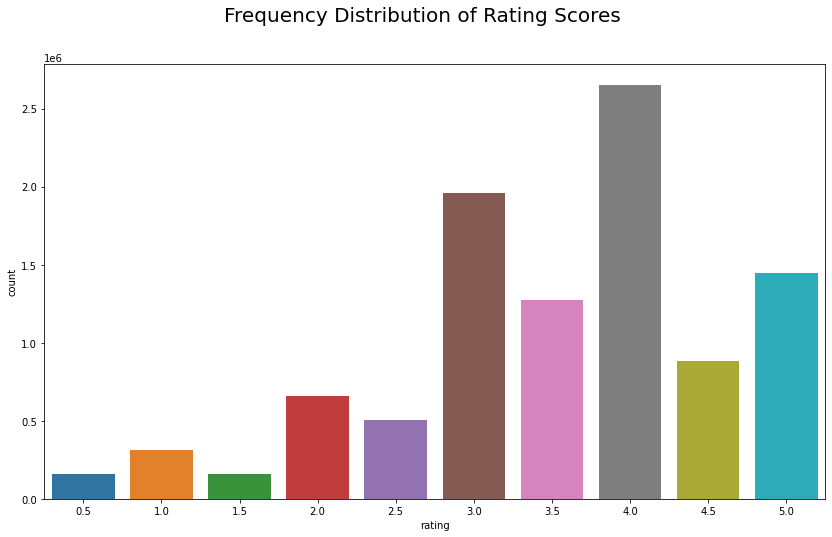

In [40]:

fig, ax = plt.subplots(figsize = (14,8))
sns.countplot(x = df_train.rating)
plt.suptitle('Frequency Distribution of Rating Scores', fontsize = 20);

## Distribution of User Ratings

Average rating in the dataset: 3.5333951730983424


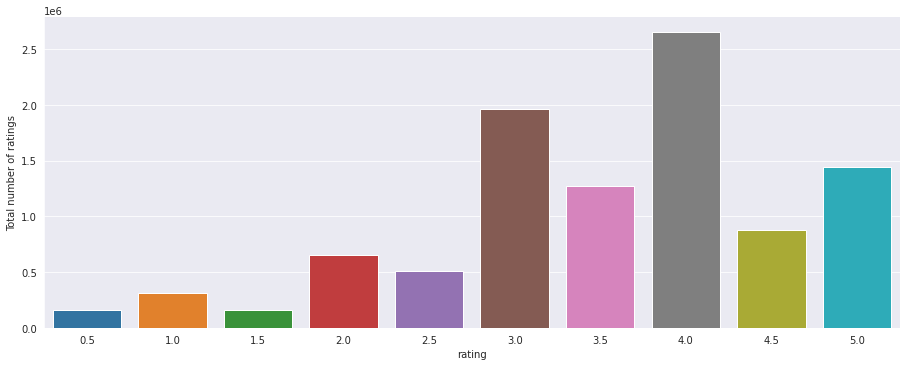

In [41]:
print (f'Average rating in the dataset: {np.mean(df_train["rating"])}')

with sns.axes_style('darkgrid'):
    g = sns.factorplot("rating", data=df_train, aspect=2.5, kind='count')
    g.set_ylabels("Total number of ratings")

## Average Rating per Genre
The genres with the highest average ratings are Film-Noir, War and Documentary genres

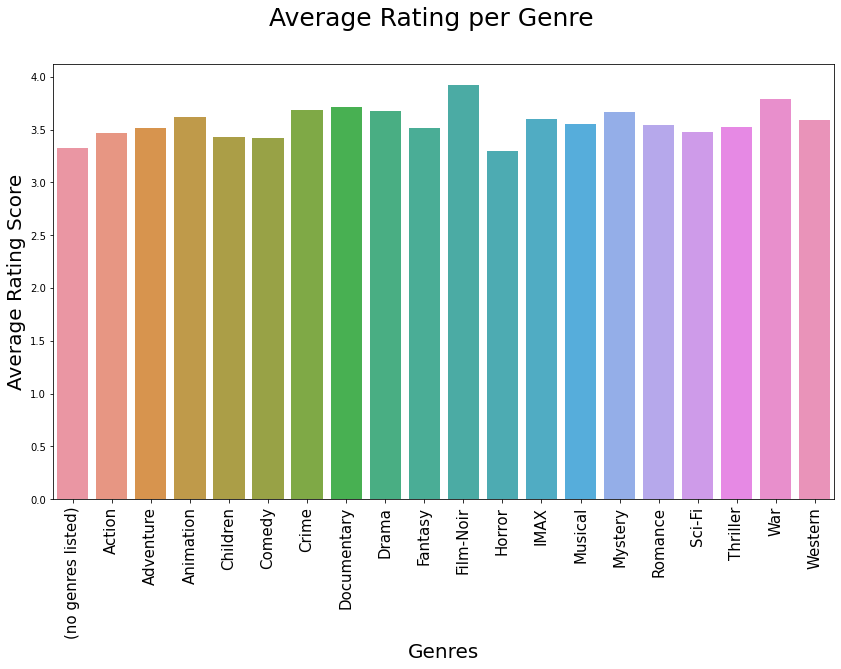

In [42]:
#subsetting the genres and rating columns from movie_ratings
genre_ratingdf = movie_ratings.loc[:,['genres', 'rating']]

# Unravel the genre columns
genre_ratingdf = genre_ratingdf.set_index(genre_ratingdf.columns.drop('genres',1).tolist()).genres.str.split('|', expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, genre_ratingdf.columns]

# group by genres and their mean rating score and resetting the index
genre_mean_rating = pd.DataFrame(genre_ratingdf.groupby('genres')['rating'].mean()).reset_index()

# plotting the figure
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x = 'genres', y = 'rating', data = genre_mean_rating)

ax.tick_params(axis='x', labelsize= 15, rotation=90)
ax.set_xlabel('Genres', fontsize= 20)
ax.set_ylabel('Average Rating Score',fontsize= 20)
plt.suptitle('Average Rating per Genre', fontsize= 25);

## Plotting the frequency vs movies_rating Histogram

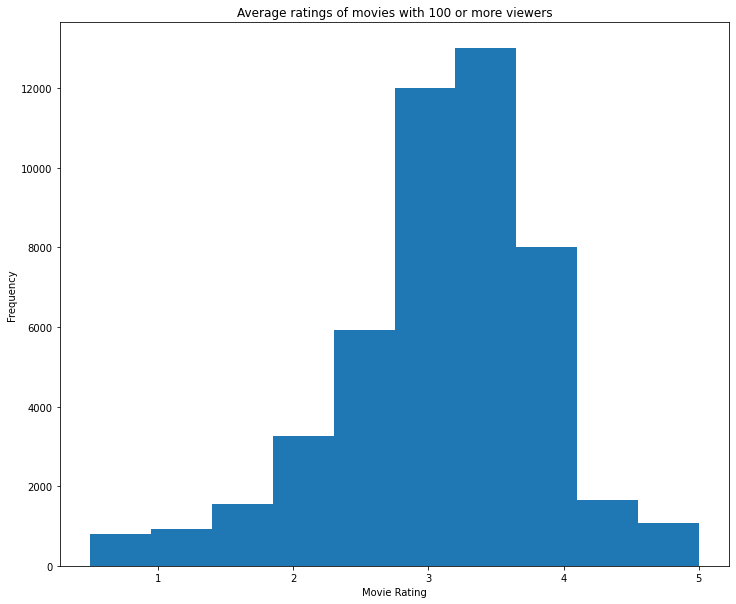

In [43]:
# Average rating of movies in the dataset
avg_rating = df_train.groupby('movieId')['rating'].mean()

# Plotting the results
plt.figure(figsize=(12,10))
avg_rating.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Movie Rating')
plt.title('Average ratings of movies with 100 or more viewers')
plt.show()

### Lets start by visualizing the rating
Since we want to check the number of ratings people did, let add a column named, 'Number of rating'

In [44]:
# Creating a plot for the movie ratings
data = movie_ratings['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x=data.index,
               y=data.values,
               marker=dict(color='yellow'))
layout = dict(title='Distribution of Movie ratings'.format(movie_ratings.shape[0]),
              xaxis=dict(title='rating'),
              yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Let's see how the genres are

In [45]:
merged_data_imdb.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


## Some preprocessing on the genre column will do

In [46]:
genres_list = []
for genre in merged_data_imdb.genres.unique():
    genres_list = genres_list + genre.split("|")
    genres_list = list(set(genres_list))
    
print(genres_list)

['Thriller', 'Drama', 'War', 'Documentary', 'Fantasy', 'Action', 'Romance', 'Horror', 'Children', 'Sci-Fi', 'IMAX', 'Comedy', 'Mystery', '(no genres listed)', 'Western', 'Adventure', 'Film-Noir', 'Animation', 'Musical', 'Crime']


In [47]:
# Make a census of the genre keywords
genre_labels = set()
for s in df_movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
   
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
                
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count
keyword_occurences, dum = count_word(df_movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

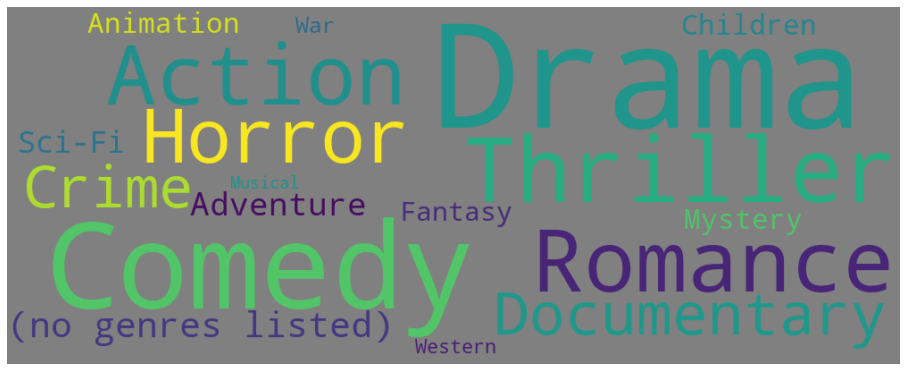

In [48]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# plot the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='grey')
genre_wordcloud.generate_from_frequencies(genres)
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
merged_data_imdb.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [50]:
# Remove pipes between the genres
merged_data_imdb['genres'] = merged_data_imdb['genres'].map(lambda x: x.lower().split('|'))
merged_data_imdb['genres'] = merged_data_imdb['genres'].apply(lambda x: " ".join(x))
merged_data_imdb.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [51]:
# Some preprocessing will done on the budget column
#Removing commas
merged_data_imdb['budget'] = merged_data_imdb['budget'].str.replace(',', '')

#remove currency signs
merged_data_imdb['budget'] = merged_data_imdb['budget'].str.extract('(\d+)', expand=False)

# Replace Nan with 0 on budget
merged_data_imdb['budget'] = merged_data_imdb['budget'].replace(np.nan, 0)

In [52]:
# Removing the years from title
merged_data_imdb['release_year'] = merged_data_imdb.title.str.extract('(\(\d\d\d\d\))', expand=False)

In [53]:
# Changing the timestamp into years
import time
merged_data_imdb['timestamp'] = merged_data_imdb['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
merged_data_imdb.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,release_year
0,5163,57669,4.0,2018,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)
1,87388,57669,3.5,2009,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)
2,137050,57669,4.0,2015,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)
3,120490,57669,4.5,2014,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)
4,50616,57669,4.5,2015,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008)


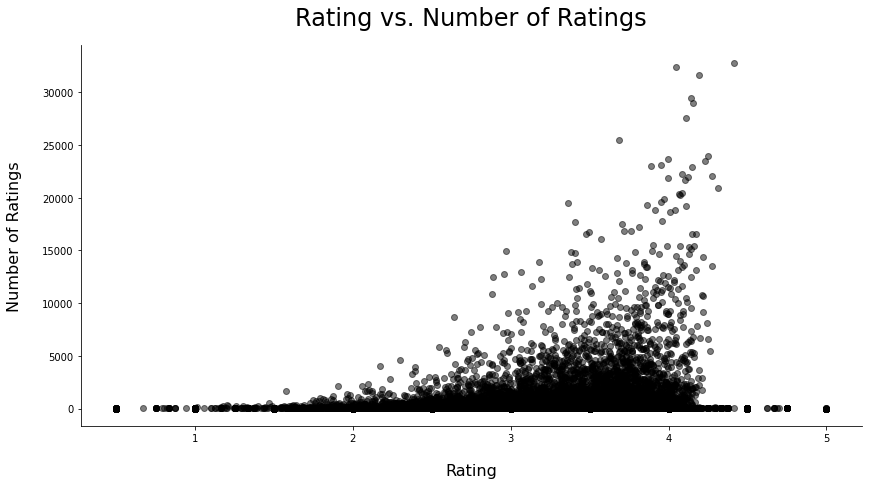

In [54]:
#create ratings dataframe
ratings_df = pd.DataFrame()

#extract average ratings
ratings_df['Mean_Rating'] = merged_data_imdb.groupby('title')['rating'].mean().values

#extract average number of ratings
ratings_df['Num_Ratings'] = merged_data_imdb.groupby('title')['rating'].count().values

#make a plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5, color='black')

The above scatterplot shows that there is a strong correlation between the number of ratings a rating-category contains and the rating category, i.e. movies that have more ratings (views) strongly tend to also have higher average ratings. This supports the previously established notion that users tend to give higher ratings in general. The plot below similarly shows that even movies with more than one hundred views (ratings) the average rating stays consistent around 3.5.

### Let's start by visualzing the movies

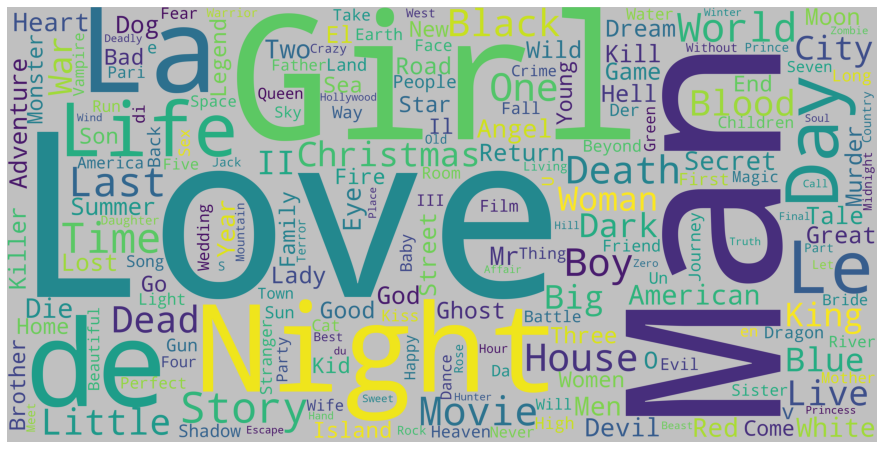

In [55]:
# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='silver', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

- We can observe from that Girl, Love and Man are the most popular title words
- We also observed that warrior, affair and without are the least popular title words

In [56]:
# Creating a dataframe for the number of movies
num_ratings = pd.DataFrame(merged_data_imdb.groupby('movieId').count()['rating']).reset_index()
merged_data_imdb = pd.merge(left=merged_data_imdb, right=num_ratings, on='movieId')
merged_data_imdb.rename(columns={'rating_x': 'rating', 'rating_y': 'NumberRatings'}, inplace=True)
merged_data_imdb.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,release_year,NumberRatings
0,5163,57669,4.0,2018,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
1,87388,57669,3.5,2009,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
2,137050,57669,4.0,2015,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
3,120490,57669,4.5,2014,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
4,50616,57669,4.5,2015,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253


In [57]:
# Dropping the duplicates in the movies
Remove_duplicates= merged_data_imdb.drop_duplicates('movieId')
Remove_duplicates.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,release_year,NumberRatings
0,5163,57669,4.0,2018,In Bruges (2008),comedy crime drama thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000,dwarf|bruges|irish|hitman,(2008),4253
4253,106343,5,4.5,2008,Father of the Bride Part II (1995),comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,(1995),4648
8901,146790,5459,5.0,2004,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,140000000,lingerie|michael jackson character|shorthaired...,(2002),5730
14631,106362,32296,2.0,2015,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime,Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115.0,45000000,female protagonist|cleave gag|good woman|fbi,(2005),658
15289,9041,366,3.0,1996,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112.0,8000000,freddy krueger|elm street|famous director as h...,(1994),1077


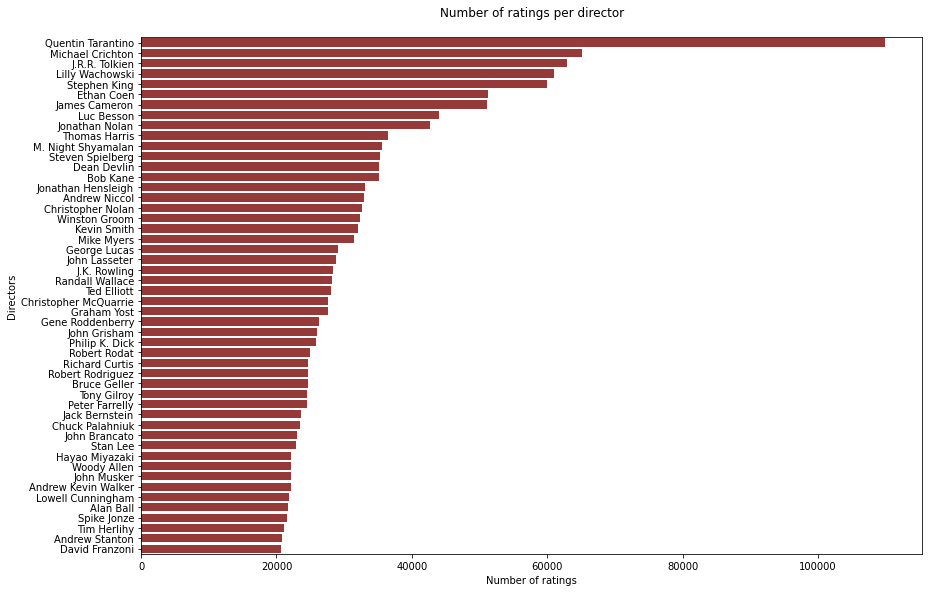

In [58]:
# Getting the number of ratings per director
Director_ratings = pd.DataFrame(Remove_duplicates.groupby('director').sum()['NumberRatings'].sort_values(ascending=False)).reset_index()

# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = Director_ratings.head(50), y = 'director', x = 'NumberRatings', color = 'brown')
plt.ylabel('Directors')
plt.xlabel('Number of ratings')
plt.title('Number of ratings per director\n')
#plt.xlim(0, 27)
plt.show()

In [59]:
# Number of movies per director
director_movies = pd.DataFrame(Remove_duplicates.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()
director_movies.head()

,director,title
0,Luc Besson,26
1,See full summary,25
2,Woody Allen,25
3,Stephen King,23
4,William Shakespeare,18


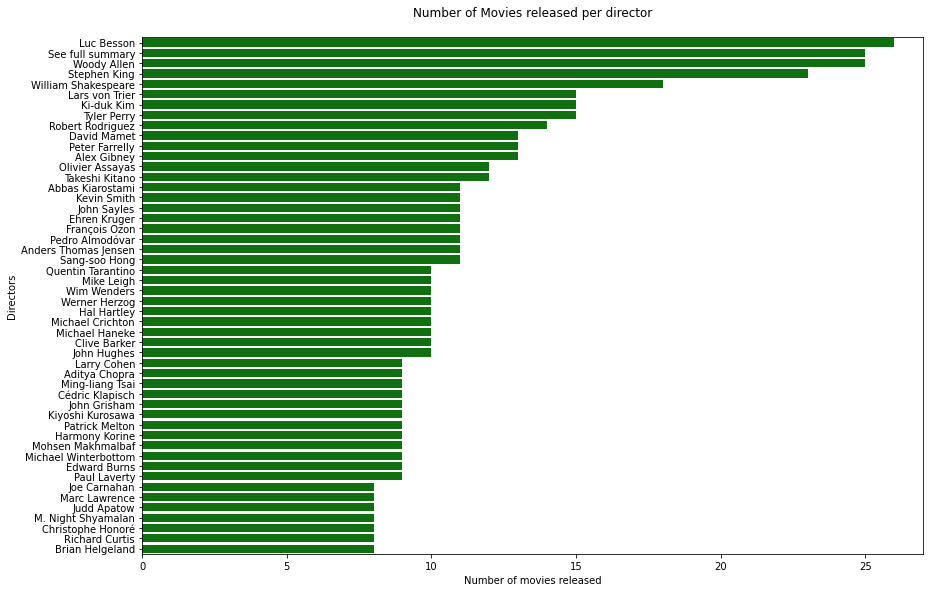

In [60]:
# Number of movies per director
director_movies = pd.DataFrame(Remove_duplicates.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()


# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = director_movies.head(50), y = 'director', x = 'title', color = 'green')
plt.ylabel('Directors')
plt.xlabel('Number of movies released')
plt.title('Number of Movies released per director\n')
plt.xlim(0, 27)
plt.show()

Below we look at average rating for individual movie directors. From the resulting dataframe it is clear that certian directors like Quentin Tarantino, Lilly Wachowski, and Stephen Kind have both higher-than-average average ratings AND higher numbers of ratings (views).

In [61]:
best_director = pd.DataFrame(merged_data_imdb.groupby('director')['rating'].mean().
                             sort_values(ascending=False))
best_director['No_of_ratings'] = merged_data_imdb.groupby('director')['rating'].count()
best_director.sort_values(by=['No_of_ratings', 'rating'], ascending=False).head(10)

,rating,No_of_ratings
director,,
Quentin Tarantino,3.936571,109919
Michael Crichton,3.273370,65157
J.R.R. Tolkien,4.080118,62963
Lilly Wachowski,3.808348,60988
Stephen King,4.049956,59903
Ethan Coen,3.947250,51185
James Cameron,3.687102,51178
Luc Besson,3.749676,44015
Jonathan Nolan,4.100516,42645


The plot below shows the distribution of ratings for directors, extending the positive correclation between 'number of ratings' and 'rating' to 'directors' as well.

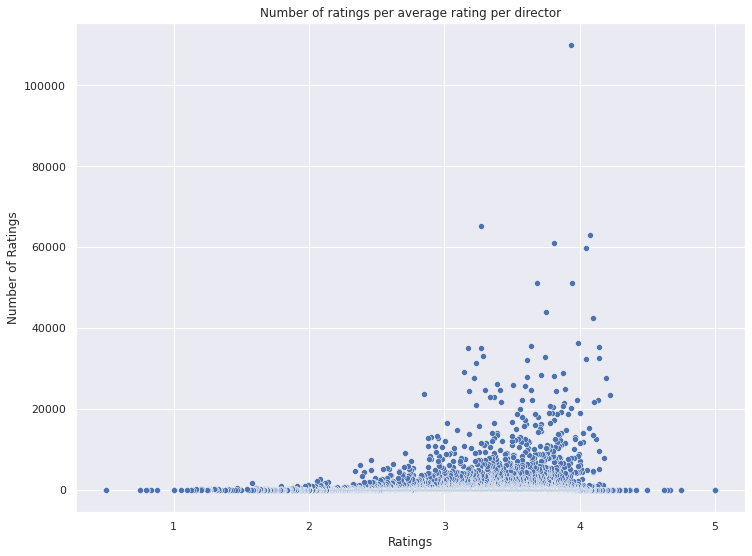

In [62]:
# Set plot size
sns.set(rc={'figure.figsize':(12,9)})

sns.scatterplot(x = 'rating', y = 'No_of_ratings', data = best_director).set_title('Number of ratings per average rating per director')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.show()

## Most common Genres

In [63]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


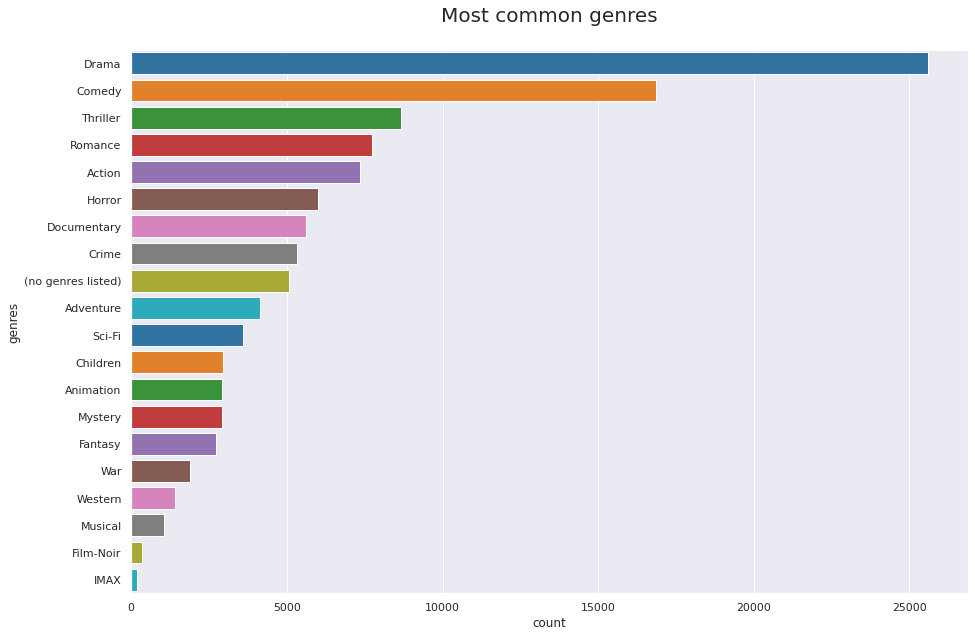

In [64]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='tab10')
plt.show()

## Correlation of Features

In [65]:
def plot_correlation_map( df ):
    
    """"
    This function gives a correlation map
    using all the features from merged data.
    
    Input : dataframe column
    datatype : dataframe (integer)        
    
    output : Figure (bar plot)
    
    """
    # Plotting using the features
    
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 250 , 11 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

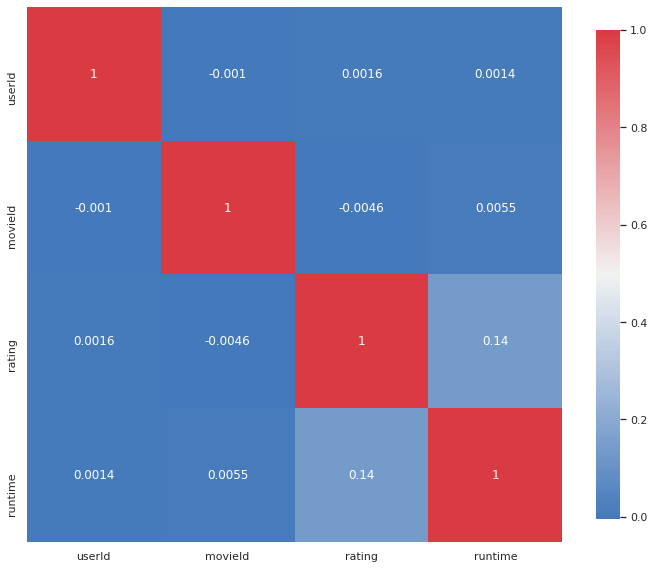

In [66]:
# Select a number of features from the dataframe to make the correlation map
plot_correlation_map(merged_data_imdb[['userId','movieId','rating', 'timestamp', 'budget','runtime']])

We can obseve that there arent any significat positive correlations amongst the features , aside from timestamp and movieId
There is a very clear correlation between movieId and timestamp, this is possibly because movies have different lengths and do not end at exactly the same time


<a id="section-sixteen"></a>
# **Collaborative and Content base filtering Explained**
image
# Collaborative Filtering
### What Is Collaborative Filtering?

We are going to give a brief explaination of collaborative filtering. Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

to be more precise it is based on similarity in preference , taste and choices of two users. A good example that we can give you could be if user A likes movies 1,2 and 3 and user B likes movies 2,3 and 4 then this implies that they have similar interests and user A should like movie 4 and B should like movie 1.

## Why Do We Consider Collaborating Filtering Over Content Based Filtering?

Collaborative filtering recommender engine is a much better algorithim then content content based filtering since it is able to do feature laerning on its own, in other words it can laern which features to use

### Advantages of Collaborative filtering:

Taken that we find collaborative filtering better than content based, We will give a few adavntages to support the argument.

Takes other user ratings into consideration
Doesnt need to study or extract information from recommended item.
It adapts to the user' interest which might change over time.
### About Collaborative Filtering Datasets:

To take note that in order for us to implement this algorithm or any recommendation algorithms we need a specific dataset that is stuctured in a specific format. This data should entail a set of items and users who have reacted to some of the items.

While working with such data, you’ll mostly see it in the form of a matrix consisting of the reactions given by a set of users to some items from a set of items. Each row would contain the ratings given by a user, and each column would contain the ratings received by an item. A matrix with five users and five items could look like this:



# Content-based Filtering

### What Is Content-based Filtering?

This filtering is based on the description or some data provided for that product. The system finds the similarity between recommended items based on their description or context. The user’s historical preference is taken into account to find products they may like in the future. For instance, if a user likes movies such as ‘Man in black’ then we can recommend him the movies of ‘Will Smith’ or movies with the genre ‘Sci-fi’.

### Techniques used for our content based filtering:

We used CountVectoriser that is used in Feature Extraction which entirely is responsible for convecting text into vectors. and the reason why we chose to use count vectoriser instead of tfidVectoriser is to avoid penalising keywords, directors and genres that occurred more frequently essentially because if we have a high count in the dataset this doesn't mean that the word is less important.

### Why we don't consider Content-based filtering:

content-based recommendation systems have inherent limitations because of their lack of use of other user data. And because it is inherently retrospective it does not help the user to find discover their potential new favourite movies. For instance, let’s say that user X and user Y like action movies. User X also likes comedy movies, because you don’t have that knowledge, you keep offering action movies. Eventually, you’re eliminating other options that user Y potentially might like.



<a id="section-seventeen"></a>
# **Main Focus Content Based Filtering**
image


In [35]:
# Create a copy of a dataframe
movies = df_movies.copy()

In [36]:
# Merge two dataframes
df_1 = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df_1 = df_1.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


In [37]:
# Convert data types to strings for string handling
df_1['title_cast'] = df_1.title_cast.astype(str)
df_1['plot_keywords'] = df_1.plot_keywords.astype(str)
df_1['genres'] = df_1.genres.astype(str)
df_1['director'] = df_1.director.astype(str)

# Removing spaces between names
df_1['director'] = df_1['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_1['title_cast'] = df_1['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df_1['title_cast'] = df_1['title_cast'].map(lambda x: x.split('|'))

# Discarding the pipes between the plot keywords' and getting only the first five words
df_1['plot_keywords'] = df_1['plot_keywords'].map(lambda x: x.split('|'))
df_1['plot_keywords'] = df_1['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df_1['genres'] = df_1['genres'].map(lambda x: x.lower().split('|'))
df_1['genres'] = df_1['genres'].apply(lambda x: " ".join(x))

df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [38]:
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer 

In [39]:
#we convert the tille_cast column from list to string
df_1['liststring'] = df_1['title_cast'].apply(lambda x: ','.join(map(str, x)))

#we remove the commas between the string in each row
df_1['liststring'] = df_1['liststring'].replace(',',' ', regex=True)

#we choose keywords, cast(liststring), diector and genres column to use as our features
df_features = df_1[['liststring','director','plot_keywords','genres']]

#we combine the features columns into  single string
df_1['combined_features'] = df_features['liststring'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']

#we now feed the combined features to a CountVectorizer() object for getting the cv matrix.
cv = countVectorizer()
cv_matrix = cv.fit_transform(df_1['combined_features'])

#now we obtain the cosine similarity matrix from the cv matrix
sim_score = cosine_similarity(cv_matrix,cv_matrix)

df_1.set_index('title', inplace = True)
indices = pd.Series(df_1.index)

In [40]:
print(sim_score)

[[1.         0.10910895 0.07715167 ... 0.03026138 0.         0.07881104]
 [0.10910895 1.         0.         ... 0.06163336 0.         0.08025724]
 [0.07715167 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.03026138 0.06163336 0.         ... 1.         0.         0.03338903]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.07881104 0.08025724 0.         ... 0.03338903 0.         1.        ]]


In [42]:
#Method to get recommenations
def recommendations(title,n,sim_score = sim_score):
    '''
    This method returns movies which are similar.
    
    Input:
        title: name of the movie to be compared
        n: number(quantity) of movies to be returned
        sim_core: similarity score
    Output:
        recommend movies
    '''
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    # populating the list with the titles of the best n matching movies
    for i in top_n_indexes:
        recommended_movies.append(list(df_1.index)[i])
        
    return recommended_movies

In [45]:
recommendations('Innocence (2014)',10)

['King Kong (1933)',
 'Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983)',
 'Island of Dr. Moreau, The (1977)',
 'The Man in the Orange Jacket (2014)',
 'She (1965)',
 'Printed Rainbow (2006)',
 'MirrorMask (2005)',
 'Seventh Son (2014)',
 'The Prophecy: Forsaken (2005)',
 'The Damned (2014)']

<a id="section-eighteen"></a>
# **Main Focus Collaborative Based Filtering**
image

<a id="section-nineteen"></a>
# **Singular value decomposition (SVD)**

SVD is decomposition of a matrix R which is the utility matrix with m equal to the number of users and m number exposed items (movies) into the product of three matrices:

U is a left singular orthogonal matrix, representing the relationship between users and latent factors Σ is a diagonal matrix (with positive real values) describing the strength of each latent factor

V(transpose) is a right singular orthogonal matrix, indicating the similarity between items and latent factors.

![](http://)![](http://)image

Decompose rating matrix R in unique prosuct of 3 matrices, with an aim to reveal latent factors in R by minimizing RMSE

r is rank of R
U and V are column orthonomal
V^T has orthonomal rows
Sum of is diagonal matrix with singular values
The aim of SVD is to make r smaller by settin smallest singular values to 0.

<a id="section-twenty"></a>
# **Modelling phase**


Here you can apply the models outline in the Intro to Recommender Notebook. You only need to apply one version 
be it Content based or Collabrative method, 
Loading Surprise Dataset:



## How do you measure the accuracy of the ratings you calculate?

Esentially there are many approaches but we will explain the main approach that we will need for this project which is the Root Mean Square Error (RMSE), in which you predict ratings for a test dataset of user-item pairs whose rating values are already known. The difference between the known value and the predicted value would be the error. Square all the error values for the test set, find the average (or mean), and then take the square root of that average to get the RMSE.



Another metric to measure the accuracy is Mean Absolute Error (MAE), in which you find the magnitude of error by finding its absolute value and then taking the average of all error values.

However we will be focusing on the RMSE for our predictions.

Before diving deep into the code we would like to clarify the Type of collaborative filtering we are going to implement.

Recommender Sysem is divided ito Three brances of which collaborative filtering is entailed, the figure below will make a clear breakdown to the reader.



In [ ]:
# Loading as Surprise dataframe 
reader = Reader()
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [ ]:
# Data split 85/15
trainset, testset = train_test_split(data, test_size=0.01)

In [ ]:
# Base algorithm
svd_a = SVD()

In [ ]:
# Fitting our trainset
svd_a.fit(trainset)

# Using the 15% testset to make predictions
predictions = svd_a.test(testset) 
predictions

test = pd.DataFrame(predictions)

In [ ]:
# View the head
test.head()

In [ ]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[svd_a.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
ratings_predictions

In [ ]:

# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
df_pred

In [ ]:

# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [ ]:
# Snippet of our ratings
df_pred.head()

In [ ]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [ ]:
# drop the two features from the dataset userId and movieId
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [ ]:
# Shape of the prediction dataset
df_pred.shape

Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [ ]:
# Submission final csv. file
df_pred.to_csv("SVD1.csv", index=False)

<a id="section-twenty-one"></a>
# **SVD prediction with altered parameters**

Parameters:

- n_factors – The number of factors. Default is 100.
- n_epochs – The number of iteration of the SGD procedure. Default is 20.
- init_mean – The mean of the normal distribution for factor vectors initialization. Default is 0.
- init_std_dev – The standard deviation of the normal distribution for factor vectors initialization. Default is 0.1.
- lr_all – The learning rate for all parameters. Default is 0.005.
- reg_all – The regularization term for all parameters. Default is 0.02.

In [33]:
# Copy of the train dataset
df_train = df_train.copy()
reader = Reader(rating_scale=(0, 5))
# Data for training the SVD model
sup_data= Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

# The full dataset for model training
sup_train = sup_data.build_full_trainset()
# The parameters obtained from randomised search CV
algo = SVD(n_factors = 200, n_epochs = 50, init_std_dev = 0.02)
# Fit the model
algo.fit(sup_train)

In [35]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
# View the predictions
ratings_predictions

[Prediction(uid=1, iid=2011, r_ui=None, est=2.9765636304376355, details={'was_impossible': False}),
 Prediction(uid=1, iid=4144, r_ui=None, est=4.375942535855171, details={'was_impossible': False}),
 Prediction(uid=1, iid=5767, r_ui=None, est=3.6681933531623843, details={'was_impossible': False}),
 Prediction(uid=1, iid=6711, r_ui=None, est=4.095216385310605, details={'was_impossible': False}),
 Prediction(uid=1, iid=7318, r_ui=None, est=2.8775138775625226, details={'was_impossible': False}),
 Prediction(uid=1, iid=8405, r_ui=None, est=3.878373977856189, details={'was_impossible': False}),
 Prediction(uid=1, iid=8786, r_ui=None, est=3.9465983703740526, details={'was_impossible': False}),
 Prediction(uid=2, iid=150, r_ui=None, est=3.3191022954445444, details={'was_impossible': False}),
 Prediction(uid=2, iid=356, r_ui=None, est=3.298037553328683, details={'was_impossible': False}),
 Prediction(uid=2, iid=497, r_ui=None, est=2.874880890507084, details={'was_impossible': False}),
 Predict

In [36]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
# View the predictions from a dataframe
df_pred

,uid,iid,r_ui,est,details
0,1,2011,None,2.976564,{'was_impossible': False}
1,1,4144,None,4.375943,{'was_impossible': False}
2,1,5767,None,3.668193,{'was_impossible': False}
3,1,6711,None,4.095216,{'was_impossible': False}
4,1,7318,None,2.877514,{'was_impossible': False}
...,...,...,...,...,...
5000014,162541,4079,None,3.760626,{'was_impossible': False}
5000015,162541,4467,None,3.965426,{'was_impossible': False}
5000016,162541,4980,None,2.868008,{'was_impossible': False}
5000017,162541,5689,None,2.640920,{'was_impossible': False}


In [37]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
# Drop the columns not required for the submission
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [38]:
# Snippet of our ratings
df_pred.head()

,userId,movieId,rating
0,1,2011,2.976564
1,1,4144,4.375943
2,1,5767,3.668193
3,1,6711,4.095216
4,1,7318,2.877514


In [39]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [40]:
# View the top 5 rows for the prediction
df_pred.head()

,userId,movieId,rating,Id
0,1,2011,2.976564,1_2011
1,1,4144,4.375943,1_4144
2,1,5767,3.668193,1_5767
3,1,6711,4.095216,1_6711
4,1,7318,2.877514,1_7318


In [41]:
# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [42]:
# Datframe that will be ready for submission
df_pred = df_pred[['Id', 'rating']]

In [43]:
# View the first 5 rows 
df_pred.head()

,Id,rating
0,1_2011,2.976564
1,1_4144,4.375943
2,1_5767,3.668193
3,1_6711,4.095216
4,1_7318,2.877514


In [44]:
# Shape of the prediction dataset
df_pred.shape

(5000019, 2)

<a id="section-twenty-two"></a>
# **Submission**

In [45]:
# Submission final csv. file
df_pred.to_csv("Final_parammetersdecreasedfurtherfinal3.csv", index=False)

<a id="section-twenty-three"></a>
# **Conclusion**



This notebook, the movieLens dataset was used to create our recommender system. The dataset draws on movie ratings and movie specific data dating back.

We the used 4 different models to build a recommender system. Due to its inefficiency we did not include the content base method as a solution.We also noticed that a high percentage of our movies were rated above 3 with the top 3 occurring ratings being 4, 3 and 5 in that order and that alone comprised 50% of total ratings. There are 19 unique movie genres in the dataset with Drama, comedy and thriller being the 3 most popular genres.

We ended upi with the model singular value decomposition(SVD), it is a collaborative filtering method that deals with the sparsity that we had with the user-user and item-item memory based methods, the advantage of being computationally more efficient than content based method 

In order to produce new recommendations we attempted collaborative based filtering methods because they draw only on past interactions between users and items. These methods do not require item meta-data like their content-based counterparts. This has an added advantage of adapting users' interest which might change over time.

The SVD model and improved where we changed the default parameters was able to predict new ratings with a RMSE score of 0.80408 on kaggle.

Possible improvements:

Collaborative filtering methods have an issue with the cold start problem, which the content based filtering method doesn’t. This problem can be addressed by implementing a hybrid recommender system that uses a combination of both content and collaborative filtering based methods.
In conclusion, Netflix had brought to light how unsurpervised learning can be used to better predict what a potential user could possibly say about a movie, that then guides the choice to recommend the movie to them or not. Collaborative filtering is more subjective over content and it's a better algorithm to choose over content based as it ensures more variery on predictions for recommendations. On model the SVD algorithm from the surprise package proved to be a better model for prediction as compared to the rest.

<a id="section-twenty-four"></a>
# **Pickling in models**


In [46]:
import pickle

model_save_path = "svd_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(algo,file)

In [47]:
model_load_path = "svd_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

<a id="section-twenty-five"></a>
# **Links to other Notebooks**


<a id="section-twenty-six"></a>
# **Reference**


https://towardsdatascience.com/exploring-movie-data-with-interactive-visualizations-c22e8ce5f663

https://medium.com/swlh/pickling-in-python-ac3c7a045ae5

https://in.springboard.com/blog/recommender-system-with-python/



https://asdkazmi.medium.com/ai-movies-recommendation-system-with-clustering-based-k-means-algorithm-f04467e02fcd

https://github.com/Wonuabimbola/movie-recommendation-system/blob/master/movie_rec_system.ipynb

https://towardsdatascience.com/unsupervised-classification-project-building-a-movie-recommender-with-clustering-analysis-and-4bab0738efe6

https://www.kaggle.com/dibyawantrivedi/movie-recommendation-system

https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d

<a id="section-twenty-seven"></a>
# **Comet**

comet experiment images

In [ ]:
# #Log Parameters of all models
# params ={'SVD_model type': 'SVD',
#          'SVD_Params': str(svd_params),
         
#          'stratify':True
# }

In [ ]:
# # Log our parameters and results
# experiment.log_parameters(params)

In [47]:
# Convert the predictions to dataframe
#test = pd.DataFrame(predictions)
accuracy.rmse(algo)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'svd_model'}
metrics = {'RMSE': accuracy.rmse(algo)}

NameError: name 'accuracy' is not defined

In [ ]:


# Log the parameters and results for the SVD tuned model
experiment.log_parameters(params)
experiment.log_parameters(metrics)
# End the experiment for the SVD tuned experiment
experiment.end()